In [20]:
# This libary allows us to download stock data from Yahoo Finance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [4]:
# Initialize the ticker class
sp500 = yf.Ticker("^GSPC")
# Get the historical prices for this ticker
sp500_data=sp500.history(period="max")
sp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,0.0,0.0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,0.0,0.0
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,0.0,0.0


In [5]:
sp500_data.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-08-22 00:00:00-04:00', '2025-08-25 00:00:00-04:00',
               '2025-08-26 00:00:00-04:00', '2025-08-27 00:00:00-04:00',
               '2025-08-28 00:00:00-04:00', '2025-08-29 00:00:00-04:00',
               '2025-09-02 00:00:00-04:00', '2025-09-03 00:00:00-04:00',
               '2025-09-04 00:00:00-04:00', '2025-09-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24536, freq=None)

<Axes: xlabel='Date'>

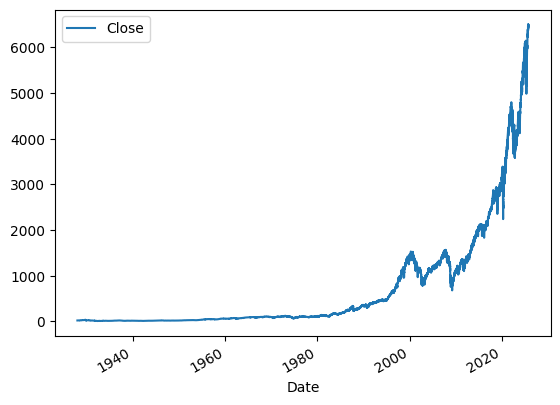

In [9]:
sp500_data.plot.line(y="Close", use_index=True)

In [10]:
del sp500_data['Dividends']
del sp500_data['Stock Splits']

In [ ]:
# Set the price for tomorrow using the shift method
sp500_data["Tomorrow"] = sp500_data["Close"].shift(-1)
sp500_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078


In [13]:
sp500_data["Target"] = (sp500_data["Tomorrow"] > sp500_data["Close"]).astype(int)
sp500_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078,1


In [ ]:
# Keep only data from 1990 onwards as that is reliable data
sp500_data = sp500_data.loc["1990-01-01":].copy()
sp500_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078,1


In [ ]:
# model training
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500_data.iloc[:-100]
test = sp500_data.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.625

<Axes: xlabel='Date'>

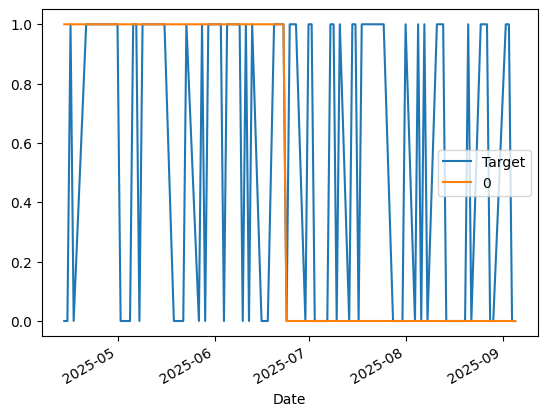

In [24]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [29]:
# Building a prediction function for the back test system
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined



In [30]:
# Building a back test system
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)



In [ ]:
# Generate predictions based on the back test system
predictions = backtest(sp500_data, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0    3821
1    2665
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298311444652908

In [33]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.53654
0    0.46346
Name: count, dtype: float64

In [35]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500_data.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500_data[ratio_column] = sp500_data["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500_data[trend_column] = sp500_data.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]
sp500_data
    

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0,0.996791,1.0,0.998532,3.0,1.031351,33.0,1.092506,141.0,1.339176,526.0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1,0.996527,0.0,0.992350,3.0,1.022916,33.0,1.084381,140.0,1.329383,526.0
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078,1,1.002544,1.0,0.997956,3.0,1.026910,33.0,1.089234,141.0,1.335628,527.0


In [36]:
sp500_data = sp500_data.dropna()
sp500_data


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28 00:00:00-04:00,6483.839844,6508.229980,6466.959961,6501.859863,4283760000,6460.259766,0,1.001576,2.0,1.004756,4.0,1.039346,34.0,1.100187,141.0,1.348337,526.0
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0,0.996791,1.0,0.998532,3.0,1.031351,33.0,1.092506,141.0,1.339176,526.0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1,0.996527,0.0,0.992350,3.0,1.022916,33.0,1.084381,140.0,1.329383,526.0


In [37]:
# Improving the model   
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds > .6] = 1
    preds[preds <= .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [40]:
# Re-reunning the back test system with the new predictors
predictions = backtest(sp500_data, model, new_predictors)
predictions["Predictions"].value_counts()


Predictions
0.0    4614
1.0     871
Name: count, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5717566016073479